In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
data = pd.read_csv('housing.csv')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [90]:
from sklearn.model_selection import train_test_split

x=data.drop('median_house_value', axis=1)
y=data['median_house_value']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [92]:
train_data = x_train.join(y_train)

In [93]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18800,-121.86,40.77,17.0,2816.0,639.0,1027.0,406.0,2.5030,INLAND,65600.0
12517,-121.46,38.56,52.0,907.0,180.0,479.0,177.0,2.2125,INLAND,104000.0
1710,-122.31,37.99,25.0,6508.0,1137.0,3259.0,1081.0,4.2348,NEAR BAY,157800.0
6231,-117.93,34.07,36.0,1207.0,209.0,683.0,213.0,5.3559,<1H OCEAN,207300.0
11660,-118.01,33.81,18.0,5238.0,1083.0,3032.0,1065.0,4.4583,<1H OCEAN,190100.0
...,...,...,...,...,...,...,...,...,...,...
4427,-118.25,34.07,16.0,719.0,225.0,801.0,218.0,2.3942,<1H OCEAN,133300.0
14078,-117.11,32.77,48.0,1502.0,272.0,590.0,265.0,2.5952,NEAR OCEAN,190300.0
16800,-122.42,37.67,42.0,2274.0,429.0,1255.0,397.0,5.1205,NEAR OCEAN,226300.0
11912,-117.44,33.96,29.0,124.0,22.0,50.0,18.0,12.5381,INLAND,112500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

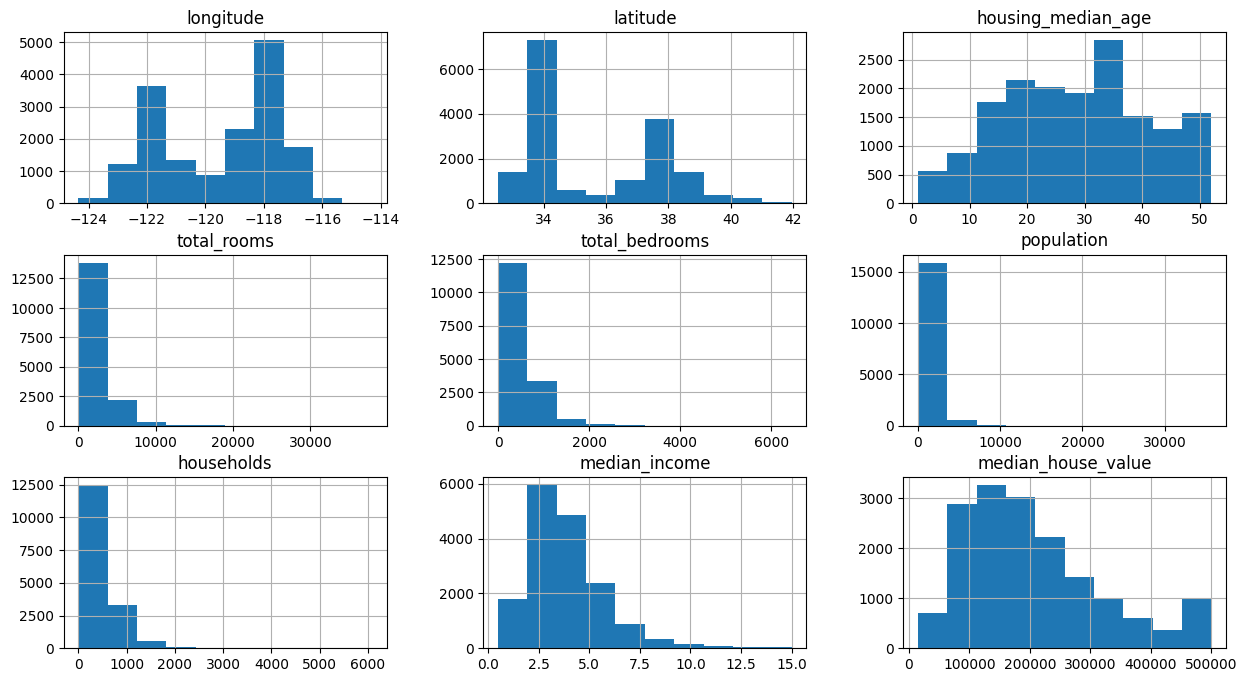

In [94]:
train_data.hist(figsize=(15,8))

<Axes: >

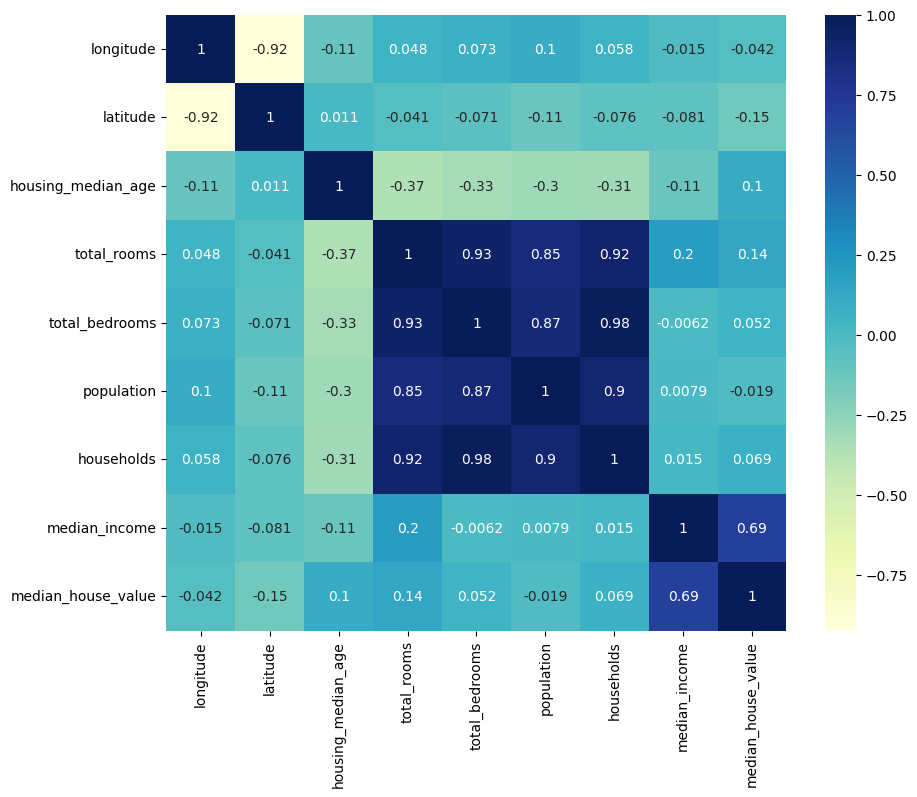

In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [96]:
# create safe ratio features before log-transform
train_data['bedrooms_per_room'] = train_data['total_bedrooms'] / train_data['total_rooms'].replace(0, np.nan)
train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households'].replace(0, np.nan)
train_data[['bedrooms_per_room','rooms_per_household']] = train_data[['bedrooms_per_room','rooms_per_household']].fillna(0)
# one-hot encode ocean_proximity to integer 0/1 and drop original column
dummies = pd.get_dummies(train_data['ocean_proximity'], dtype=int)
train_data = pd.concat([train_data.drop('ocean_proximity', axis=1), dummies], axis=1)
# log-transform counts (use log1p for safety)
train_data['total_rooms'] = np.log1p(train_data['total_rooms'])
train_data['total_bedrooms'] = np.log1p(train_data['total_bedrooms'])
train_data['population'] = np.log1p(train_data['population'])
train_data['households'] = np.log1p(train_data['households'])


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'bedrooms_per_room'}>,
        <Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': '<1H OCEAN'}>],
       [<Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>]], dtype=object)

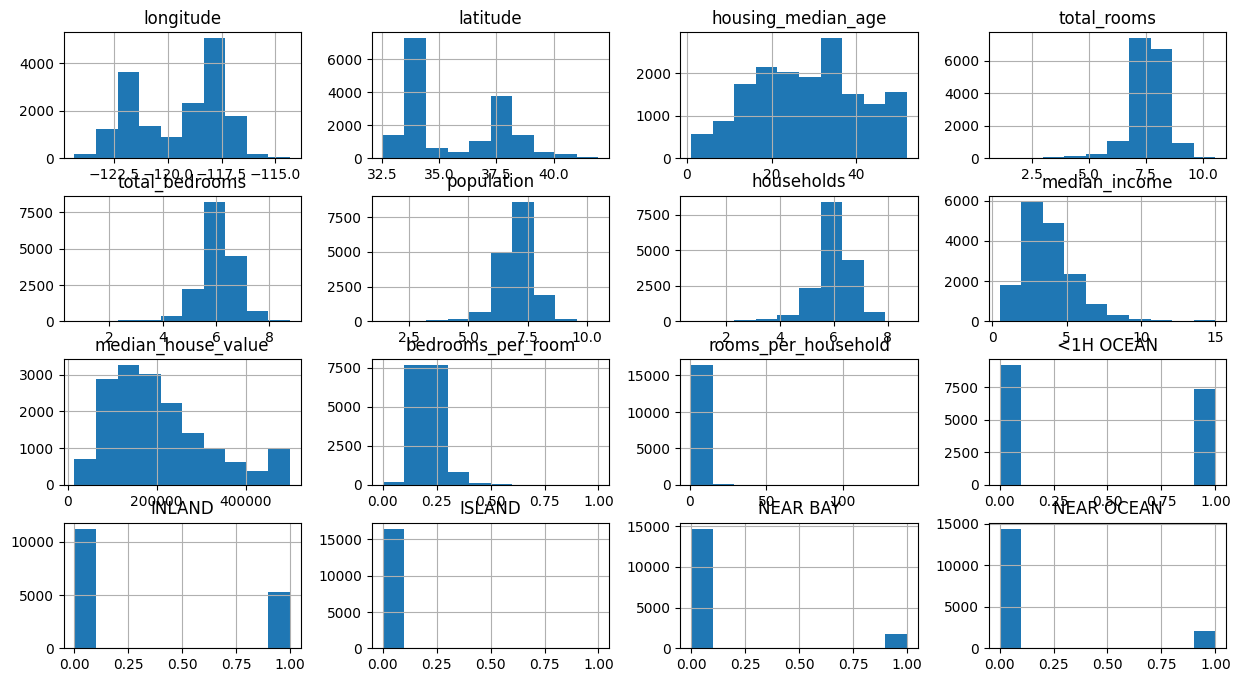

In [97]:
train_data.hist(figsize=(15,8))

In [98]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop('ocean_proximity', axis=1)

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

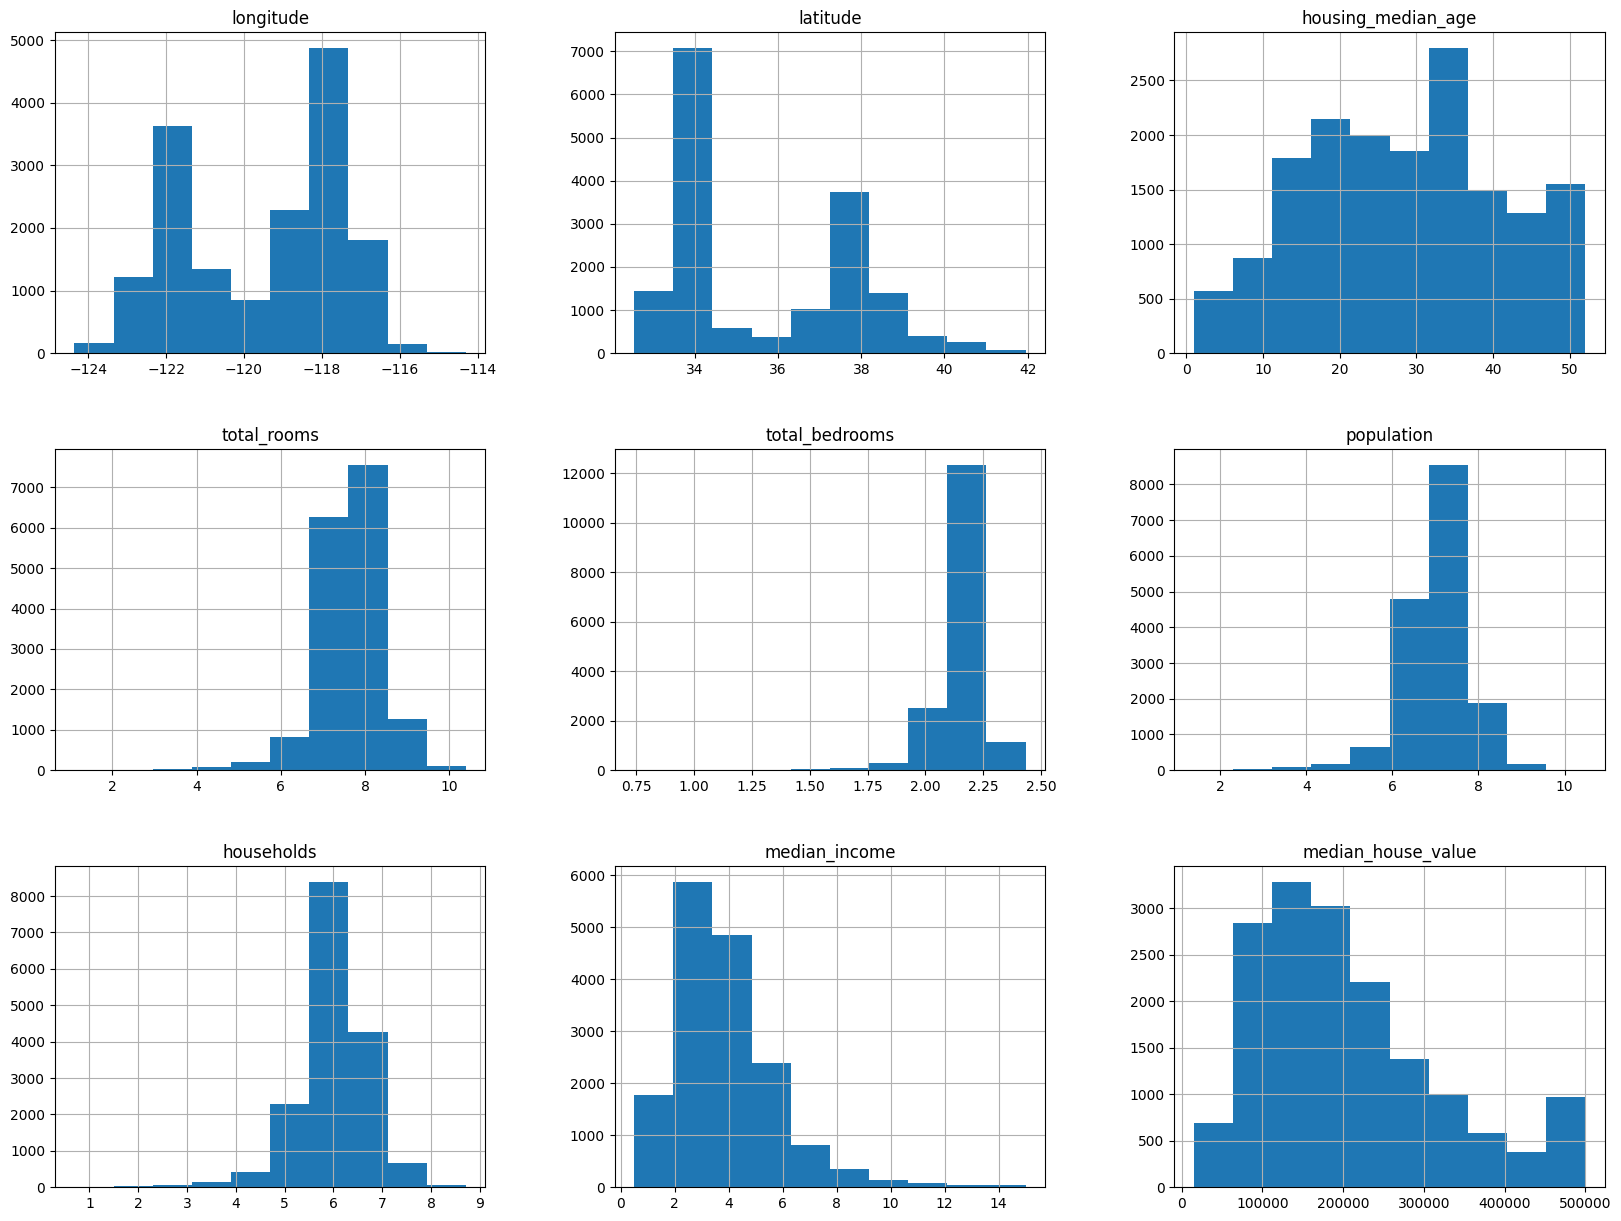

In [ ]:
train_data.hist(figsize=(20,15))

<Axes: >

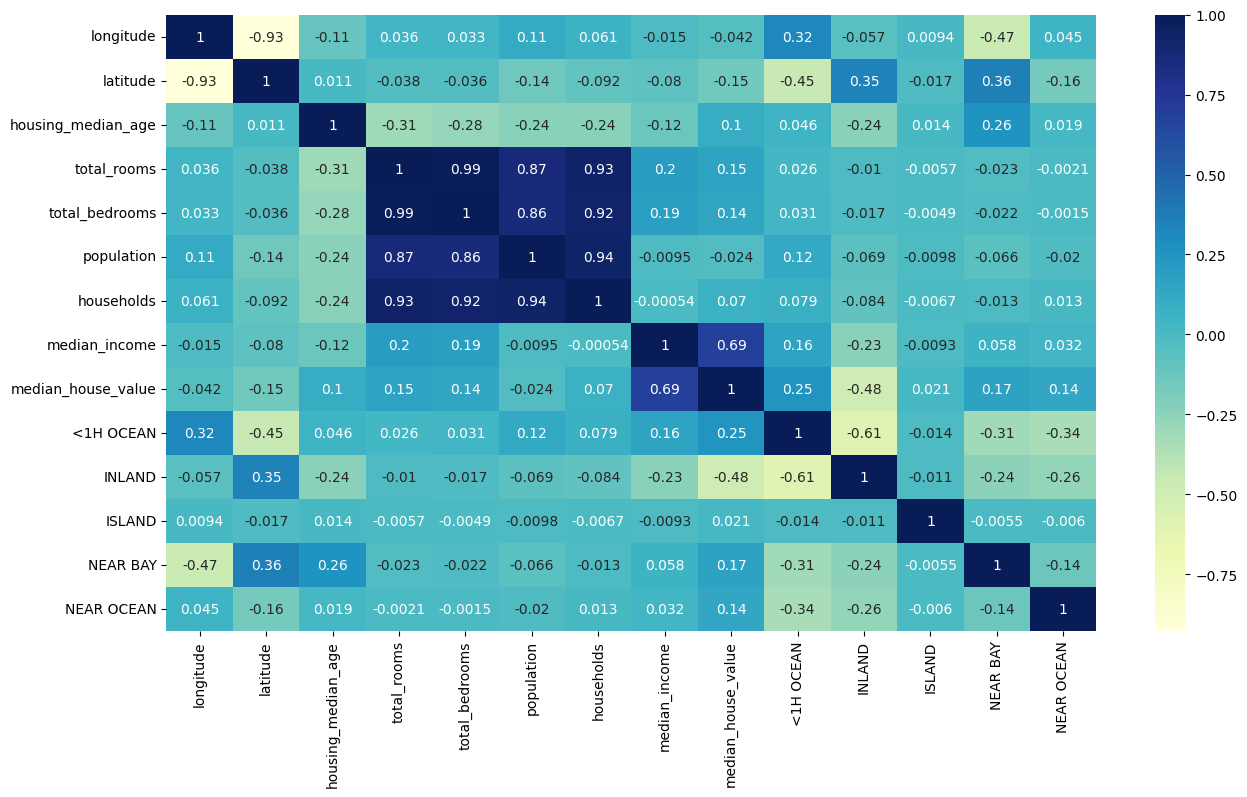

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

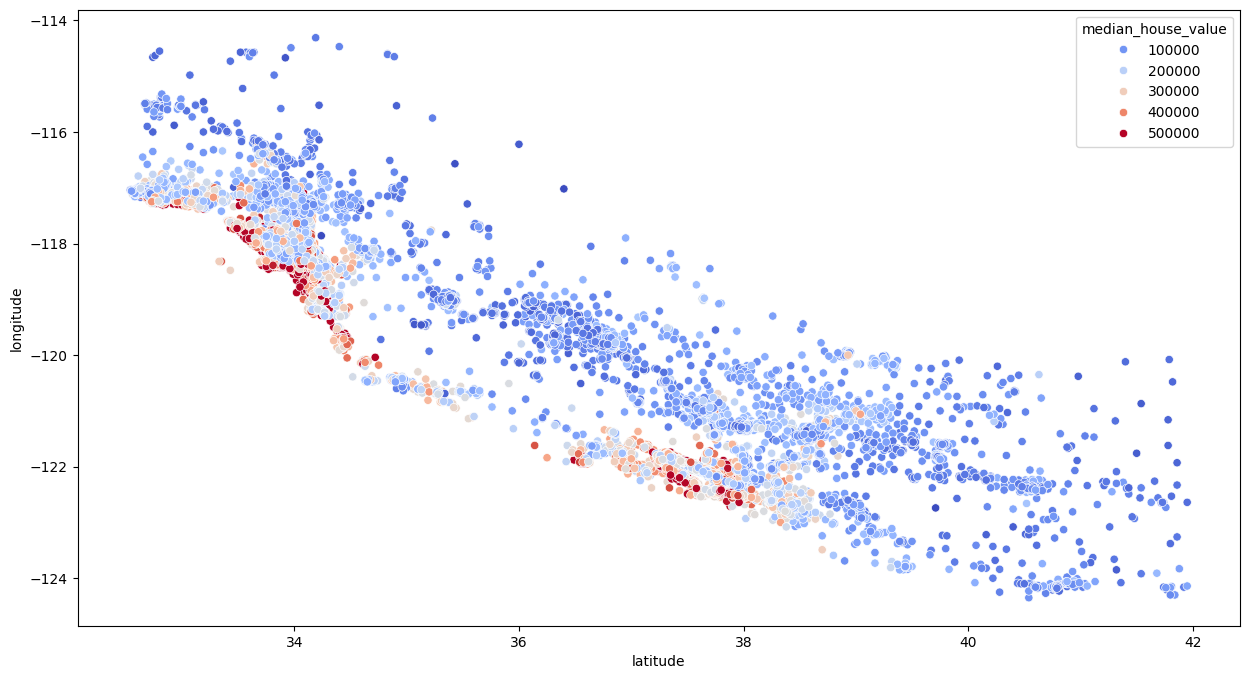

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [ ]:
train_data['bedrooms_per_room'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_per_room'] = train_data['total_rooms'] / train_data['households']

<Axes: >

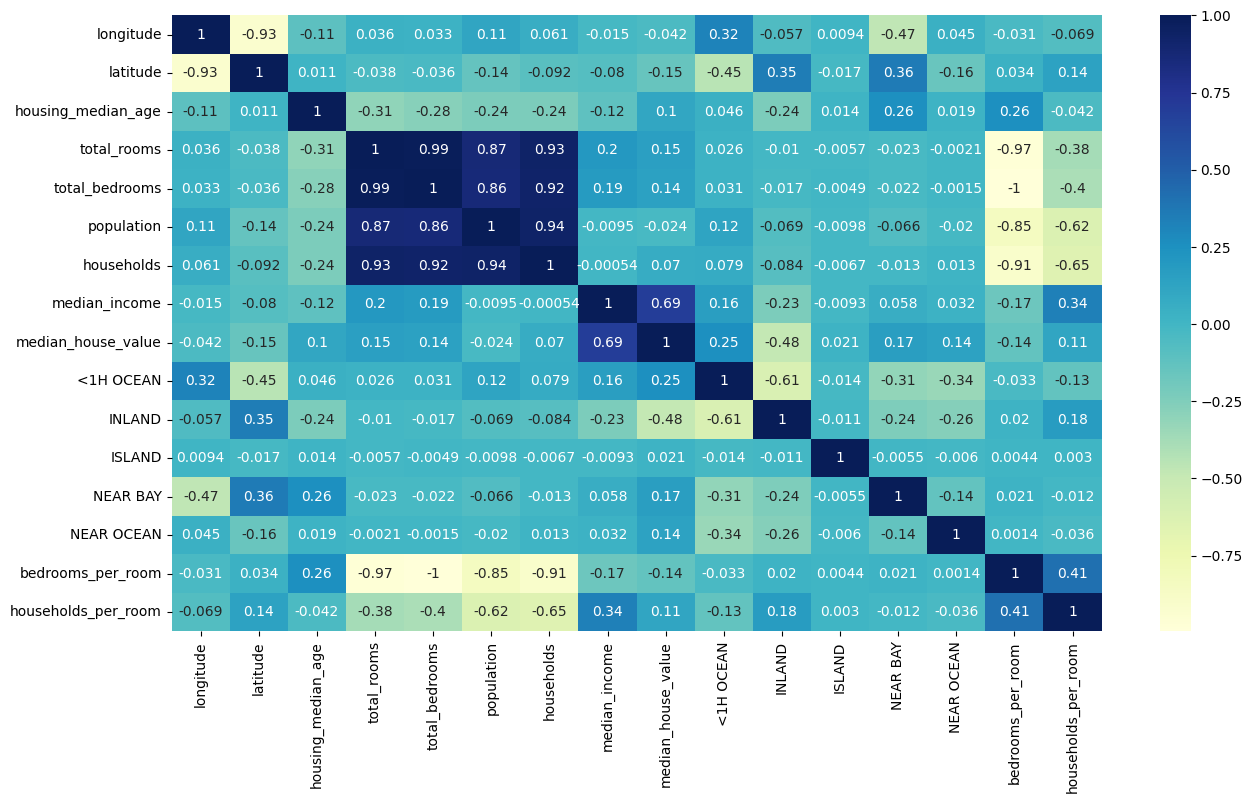

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [ ]:
from sklearn.linear_model import LinearRegression
x_train,y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_rooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)  
test_data['households'] = np.log(test_data['households'] +1)

test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop('ocean_proximity', axis=1)
test_data['bedrooms_per_room'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_per_room'] = test_data['total_rooms'] / test_data['households']

In [ ]:
test_data 


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedrooms_per_room,households_per_room
14565,-117.20,32.84,32.0,7.617760,2.153825,6.897705,5.966147,3.2583,NEAR OCEAN,181400.0,0.282737,1.276831
16500,-121.04,37.78,32.0,7.978311,2.194812,7.290975,6.161207,2.5643,INLAND,200000.0,0.275097,1.294927
14867,-117.09,32.64,20.0,7.600902,2.151867,7.172425,6.385194,1.6321,NEAR OCEAN,57500.0,0.283107,1.190395
2076,-119.83,36.75,33.0,6.496775,2.014473,6.410175,5.204007,1.3929,INLAND,55600.0,0.310073,1.248418
1442,-122.00,37.99,28.0,8.303009,2.230338,7.540090,6.492240,5.4607,INLAND,192300.0,0.268618,1.278913
...,...,...,...,...,...,...,...,...,...,...,...,...
20298,-119.20,34.18,22.0,8.774313,2.279758,7.899153,7.223296,2.9832,NEAR OCEAN,165600.0,0.259822,1.214724
14539,-117.14,32.92,15.0,7.351800,2.122477,6.856462,5.808142,5.2864,<1H OCEAN,174400.0,0.288702,1.265775
469,-122.29,37.87,46.0,7.145196,2.097428,6.675823,5.774552,2.5250,NEAR BAY,165900.0,0.293544,1.237359
9006,-118.59,34.11,35.0,7.781973,2.172701,6.961296,6.126869,6.4504,<1H OCEAN,407000.0,0.279197,1.270139


In [116]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,rooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18800,-121.86,40.77,17.0,7.943428,6.461468,6.935370,6.008813,2.5030,65600.0,0.226918,6.935961,0,1,0,0,0
12517,-121.46,38.56,52.0,6.811244,5.198497,6.173786,5.181784,2.2125,104000.0,0.198456,5.124294,0,1,0,0,0
1710,-122.31,37.99,25.0,8.780941,7.037028,8.089482,6.986566,4.2348,157800.0,0.174708,6.020352,0,0,0,1,0
6231,-117.93,34.07,36.0,7.096721,5.347108,6.527958,5.365976,5.3559,207300.0,0.173157,5.666667,1,0,0,0,0
11660,-118.01,33.81,18.0,8.563886,6.988413,8.017308,6.971669,4.4583,190100.0,0.206758,4.918310,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,-118.25,34.07,16.0,6.579251,5.420535,6.687109,5.389072,2.3942,133300.0,0.312935,3.298165,1,0,0,0,0
14078,-117.11,32.77,48.0,7.315218,5.609472,6.381816,5.583496,2.5952,190300.0,0.181092,5.667925,0,0,0,0,1
16800,-122.42,37.67,42.0,7.729735,6.063785,7.135687,5.986452,5.1205,226300.0,0.188654,5.727960,0,0,0,0,1
11912,-117.44,33.96,29.0,4.828314,3.135494,3.931826,2.944439,12.5381,112500.0,0.177419,6.888889,0,1,0,0,0


In [ ]:
# 1) build test_data
test_data = x_test.join(y_test)

# 2) create ratios BEFORE log transforms (avoid division-by-zero)
test_data['bedrooms_per_room'] = test_data['total_bedrooms'] / test_data['total_rooms'].replace(0, np.nan)
test_data['rooms_per_household'] = test_data['total_rooms'] / test_data['households'].replace(0, np.nan)
test_data[['bedrooms_per_room','rooms_per_household']] = test_data[['bedrooms_per_room','rooms_per_household']].fillna(0)

# 3) one-hot encode ocean_proximity to 0/1 and drop original (assign back)
dummies = pd.get_dummies(test_data['ocean_proximity'], dtype=int)
test_data = pd.concat([test_data.drop('ocean_proximity', axis=1), dummies], axis=1)

# 4) log-transform counts (use log1p for safety)
test_data['total_rooms'] = np.log1p(test_data['total_rooms'])
test_data['total_bedrooms'] = np.log1p(test_data['total_bedrooms'])
test_data['population'] = np.log1p(test_data['population'])
test_data['households'] = np.log1p(test_data['households'])



<class 'pandas.core.frame.DataFrame'>
Index: 4087 entries, 14565 to 14755
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            4087 non-null   float64
 1   latitude             4087 non-null   float64
 2   housing_median_age   4087 non-null   float64
 3   total_rooms          4087 non-null   float64
 4   total_bedrooms       4087 non-null   float64
 5   population           4087 non-null   float64
 6   households           4087 non-null   float64
 7   median_income        4087 non-null   float64
 8   median_house_value   4087 non-null   float64
 9   bedrooms_per_room    4087 non-null   float64
 10  rooms_per_household  4087 non-null   float64
 11  <1H OCEAN            4087 non-null   int64  
 12  INLAND               4087 non-null   int64  
 13  ISLAND               4087 non-null   int64  
 14  NEAR BAY             4087 non-null   int64  
 15  NEAR OCEAN           4087 non-null   i

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,rooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14565,-117.20,32.84,32.0,7.617760,5.978886,6.897705,5.966147,3.2583,181400.0,0.193802,5.226221,0,0,0,0,1
16500,-121.04,37.78,32.0,7.978311,6.270988,7.290975,6.161207,2.5643,200000.0,0.181070,6.164905,0,1,0,0,0
14867,-117.09,32.64,20.0,7.600902,6.480045,7.172425,6.385194,1.6321,57500.0,0.325663,3.376689,0,0,0,0,1
2076,-119.83,36.75,33.0,6.496775,5.214936,6.410175,5.204007,1.3929,55600.0,0.276435,3.657459,0,1,0,0,0
1442,-122.00,37.99,28.0,8.303009,6.464588,7.540090,6.492240,5.4607,192300.0,0.158860,6.122914,0,1,0,0,0


In [ ]:
x_test , y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']

In [ ]:
test_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,rooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14565,-117.20,32.84,32.0,7.617760,5.978886,6.897705,5.966147,3.2583,181400.0,0.193802,5.226221,0,0,0,0,1
16500,-121.04,37.78,32.0,7.978311,6.270988,7.290975,6.161207,2.5643,200000.0,0.181070,6.164905,0,1,0,0,0
14867,-117.09,32.64,20.0,7.600902,6.480045,7.172425,6.385194,1.6321,57500.0,0.325663,3.376689,0,0,0,0,1
2076,-119.83,36.75,33.0,6.496775,5.214936,6.410175,5.204007,1.3929,55600.0,0.276435,3.657459,0,1,0,0,0
1442,-122.00,37.99,28.0,8.303009,6.464588,7.540090,6.492240,5.4607,192300.0,0.158860,6.122914,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20298,-119.20,34.18,22.0,8.774313,7.242798,7.899153,7.223296,2.9832,165600.0,0.216087,4.718978,0,0,0,0,1
14539,-117.14,32.92,15.0,7.351800,5.752573,6.856462,5.808142,5.2864,174400.0,0.201540,4.692771,1,0,0,0,0
469,-122.29,37.87,46.0,7.145196,5.783825,6.675823,5.774552,2.5250,165900.0,0.255722,3.947040,0,0,0,1,0
9006,-118.59,34.11,35.0,7.781973,6.159095,6.961296,6.126869,6.4504,407000.0,0.196995,5.242888,1,0,0,0,0


In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_per_room,households_per_room,median_house_value,rooms_per_household
16889,-122.37,37.59,39.0,2.245354,1.177225,2.160615,2.081404,3.4412,False,False,False,False,True,0.524293,1.203550,353800.0,1.078769
7325,-118.18,33.99,35.0,2.093786,1.129396,2.118885,1.931507,2.1520,True,False,False,False,False,0.539404,1.206052,170800.0,1.084017
11987,-117.48,34.00,12.0,2.284176,1.189116,2.207354,2.083731,3.8529,False,True,False,False,False,0.520589,1.253498,145500.0,1.096195
5451,-118.46,34.01,43.0,1.979928,1.091899,1.885136,1.730662,5.6428,True,False,False,False,False,0.551484,1.344035,343100.0,1.144029
6247,-117.97,34.05,36.0,2.100484,1.131558,2.033210,1.853152,3.5179,True,False,False,False,False,0.538713,1.332761,161400.0,1.133465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10347,-117.66,33.61,21.0,2.147898,1.146735,2.048737,1.896042,7.1497,True,False,False,False,False,0.533887,1.337018,274000.0,1.132832
6326,-117.96,34.00,33.0,2.262362,1.182452,2.215772,2.056547,4.4038,True,False,False,False,False,0.522662,1.262040,186700.0,1.100078
305,-122.18,37.76,43.0,2.152966,1.148344,2.081179,1.932692,1.8913,False,False,False,True,False,0.533378,1.288126,91200.0,1.113972
8019,-118.10,33.84,36.0,2.019975,1.105249,1.910860,1.732356,3.7813,True,False,False,False,False,0.547159,1.404855,209100.0,1.166028


In [ ]:
reg.score(x_test,y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- rooms_per_household
Feature names seen at fit time, yet now missing:
- households_per_room


In [ ]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_per_room,rooms_per_household
14565,-117.20,32.84,32.0,7.617760,5.978886,6.897705,5.966147,3.2583,0,0,0,0,1,0.193802,5.226221
16500,-121.04,37.78,32.0,7.978311,6.270988,7.290975,6.161207,2.5643,0,1,0,0,0,0.181070,6.164905
14867,-117.09,32.64,20.0,7.600902,6.480045,7.172425,6.385194,1.6321,0,0,0,0,1,0.325663,3.376689
2076,-119.83,36.75,33.0,6.496775,5.214936,6.410175,5.204007,1.3929,0,1,0,0,0,0.276435,3.657459
1442,-122.00,37.99,28.0,8.303009,6.464588,7.540090,6.492240,5.4607,0,1,0,0,0,0.158860,6.122914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20298,-119.20,34.18,22.0,8.774313,7.242798,7.899153,7.223296,2.9832,0,0,0,0,1,0.216087,4.718978
14539,-117.14,32.92,15.0,7.351800,5.752573,6.856462,5.808142,5.2864,1,0,0,0,0,0.201540,4.692771
469,-122.29,37.87,46.0,7.145196,5.783825,6.675823,5.774552,2.5250,0,0,0,1,0,0.255722,3.947040
9006,-118.59,34.11,35.0,7.781973,6.159095,6.961296,6.126869,6.4504,1,0,0,0,0,0.196995,5.242888


In [ ]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_per_room,rooms_per_household
16889,-122.37,37.59,39.0,8.443762,2.245354,7.676474,7.015712,3.4412,0,0,0,0,1,0.265919,1.203550
7325,-118.18,33.99,35.0,7.115582,2.093786,7.321850,5.899897,2.1520,1,0,0,0,0,0.294254,1.206052
11987,-117.48,34.00,12.0,8.817594,2.284176,8.091627,7.034388,3.8529,0,1,0,0,0,0.259048,1.253498
5451,-118.46,34.01,43.0,6.242223,1.979928,5.587249,4.644391,5.6428,1,0,0,0,0,0.317183,1.344035
6247,-117.97,34.05,36.0,7.170120,2.100484,6.638568,5.379897,3.5179,1,0,0,0,0,0.292950,1.332761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10347,-117.66,33.61,21.0,7.566828,2.147898,6.758095,5.659482,7.1497,1,0,0,0,0,0.283857,1.337018
6326,-117.96,34.00,33.0,8.605753,2.262362,8.168486,6.818924,4.4038,1,0,0,0,0,0.262890,1.262040
305,-122.18,37.76,43.0,7.610358,2.152966,7.013915,5.908083,1.8913,0,0,0,1,0,0.282899,1.288126
8019,-118.10,33.84,36.0,6.538140,2.019975,5.758902,4.653960,3.7813,1,0,0,0,0,0.308953,1.404855


In [ ]:
# 1) unify swapped column names: prefer 'rooms_per_household'
if 'households_per_room' in x_train.columns and 'rooms_per_household' not in x_train.columns:
    x_train = x_train.rename(columns={'households_per_room': 'rooms_per_household'})
if 'households_per_room' in x_test.columns and 'rooms_per_household' not in x_test.columns:
    x_test = x_test.rename(columns={'households_per_room': 'rooms_per_household'})

# 2) convert boolean dummy columns to ints (both sets)
for df in (x_train, x_test):
    bool_cols = [c for c in df.columns if df[c].dtype == 'bool']
    for c in bool_cols:
        df[c] = df[c].astype(int)

# 3) add any missing columns to x_test (with zeros) and reorder to match x_train
for c in x_train.columns:
    if c not in x_test.columns:
        x_test[c] = 0
x_test = x_test[x_train.columns]

# 4) ensure same dtypes for numeric columns (optional): cast x_test cols to x_train dtypes
for c in x_train.columns:
    try:
        x_test[c] = x_test[c].astype(x_train[c].dtype)
    except Exception:
        pass

# 5) final check and score
print('Columns match:', list(x_train.columns) == list(x_test.columns))
print('Missing in test:', set(x_train.columns) - set(x_test.columns))
print('Extra in test: ', set(x_test.columns) - set(x_train.columns))

score = reg.score(x_test, y_test)
print('R^2 on test:', score)

Columns match: True
Missing in test: set()
Extra in test:  set()


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- rooms_per_household
Feature names seen at fit time, yet now missing:
- households_per_room


In [ ]:
# unify swapped name to 'rooms_per_household'
rename_map = {}
if 'households_per_room' in x_train.columns and 'rooms_per_household' not in x_train.columns:
    rename_map['households_per_room'] = 'rooms_per_household'
if 'households_per_room' in x_test.columns and 'rooms_per_household' not in x_test.columns:
    rename_map['households_per_room'] = 'rooms_per_household'
if rename_map:
    x_train = x_train.rename(columns=rename_map)
    x_test = x_test.rename(columns=rename_map)

# convert boolean dummies to ints
for df in (x_train, x_test):
    for c in df.select_dtypes(include='bool').columns:
        df[c] = df[c].astype(int)

# add any missing columns to x_test and order like x_train
for c in x_train.columns:
    if c not in x_test.columns:
        x_test[c] = 0
x_test = x_test[x_train.columns]

# retrain and score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
print('Retrained on', x_train.shape)
print('R^2 on test:', reg.score(x_test, y_test))

Retrained on (16346, 15)
R^2 on test: -2084.456461211381


In [ ]:
reg.score(x_test,y_test)

-2084.456461211381

In [ ]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_per_room,rooms_per_household
16889,-122.37,37.59,39.0,8.443762,2.245354,7.676474,7.015712,3.4412,0,0,0,0,1,0.265919,1.203550
7325,-118.18,33.99,35.0,7.115582,2.093786,7.321850,5.899897,2.1520,1,0,0,0,0,0.294254,1.206052
11987,-117.48,34.00,12.0,8.817594,2.284176,8.091627,7.034388,3.8529,0,1,0,0,0,0.259048,1.253498
5451,-118.46,34.01,43.0,6.242223,1.979928,5.587249,4.644391,5.6428,1,0,0,0,0,0.317183,1.344035
6247,-117.97,34.05,36.0,7.170120,2.100484,6.638568,5.379897,3.5179,1,0,0,0,0,0.292950,1.332761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10347,-117.66,33.61,21.0,7.566828,2.147898,6.758095,5.659482,7.1497,1,0,0,0,0,0.283857,1.337018
6326,-117.96,34.00,33.0,8.605753,2.262362,8.168486,6.818924,4.4038,1,0,0,0,0,0.262890,1.262040
305,-122.18,37.76,43.0,7.610358,2.152966,7.013915,5.908083,1.8913,0,0,0,1,0,0.282899,1.288126
8019,-118.10,33.84,36.0,6.538140,2.019975,5.758902,4.653960,3.7813,1,0,0,0,0,0.308953,1.404855


In [ ]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_per_room,rooms_per_household
14565,-117.20,32.84,32.0,7.617760,5.978886,6.897705,5.966147,3.2583,0,0,0,0,1,0.193802,5.226221
16500,-121.04,37.78,32.0,7.978311,6.270988,7.290975,6.161207,2.5643,0,1,0,0,0,0.181070,6.164905
14867,-117.09,32.64,20.0,7.600902,6.480045,7.172425,6.385194,1.6321,0,0,0,0,1,0.325663,3.376689
2076,-119.83,36.75,33.0,6.496775,5.214936,6.410175,5.204007,1.3929,0,1,0,0,0,0.276435,3.657459
1442,-122.00,37.99,28.0,8.303009,6.464588,7.540090,6.492240,5.4607,0,1,0,0,0,0.158860,6.122914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20298,-119.20,34.18,22.0,8.774313,7.242798,7.899153,7.223296,2.9832,0,0,0,0,1,0.216087,4.718978
14539,-117.14,32.92,15.0,7.351800,5.752573,6.856462,5.808142,5.2864,1,0,0,0,0,0.201540,4.692771
469,-122.29,37.87,46.0,7.145196,5.783825,6.675823,5.774552,2.5250,0,0,0,1,0,0.255722,3.947040
9006,-118.59,34.11,35.0,7.781973,6.159095,6.961296,6.126869,6.4504,1,0,0,0,0,0.196995,5.242888


In [ ]:
# Diagnostics
print("'median_house_value' in X_train columns?", 'median_house_value' in x_train.columns)
print("\nDescribe problematic features:")
print(x_train[['total_bedrooms','bedrooms_per_room']].describe())
print("\nCorrelation with target:")
print(train_data[['total_bedrooms','bedrooms_per_room','median_house_value']].corr()['median_house_value'].sort_values())

# Try dropping highly collinear features and retrain (linear + ridge)
from sklearn.linear_model import LinearRegression, Ridge

candidates = [
    ([], "none"),
    (['bedrooms_per_room'], "drop ratio"),
    (['total_bedrooms'], "drop raw total_bedrooms"),
    (['bedrooms_per_room','total_bedrooms'], "drop both")
]

for drop_cols, label in candidates:
    Xt = x_train.drop(columns=drop_cols)
    Xs = x_test.drop(columns=drop_cols)
    lr = LinearRegression().fit(Xt, y_train)
    rr = Ridge(alpha=1.0).fit(Xt, y_train)
    print(f"\n=== {label} ===")
    print("Linear R^2:", lr.score(Xs, y_test))
    print("Ridge R^2:", rr.score(Xs, y_test))
    # inspect top coefficients for Linear
    try:
        coefs = pd.Series(lr.coef_, index=Xt.columns).abs().sort_values(ascending=False).head(8)
        print("Top coef magnitudes (linear):\n", coefs)
    except Exception:
        pass

'median_house_value' in X_train columns? False

Describe problematic features:
       total_bedrooms  bedrooms_per_room
count    16346.000000       16346.000000
mean         2.151403           0.283688
std          0.094768           0.019190
min          0.741276           0.234101
25%          2.114528           0.273526
50%          2.159837           0.281605
75%          2.203361           0.290231
max          2.432993           0.674739

Correlation with target:
bedrooms_per_room    -0.136501
total_bedrooms        0.139169
median_house_value    1.000000
Name: median_house_value, dtype: float64

=== none ===
Linear R^2: -2084.456461211381
Ridge R^2: -10.159882622996967
Top coef magnitudes (linear):
 bedrooms_per_room      3.684575e+06
total_bedrooms         1.478661e+06
households             1.277302e+05
ISLAND                 1.159218e+05
population             1.026251e+05
total_rooms            7.741438e+04
rooms_per_household    6.791566e+04
INLAND                 5.600467e+

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def eval_model(Xtr, Xs, ytr, ys, model):
    model.fit(Xtr, ytr)
    yp = model.predict(Xs)
    return r2_score(ys, yp), mean_squared_error(ys, yp), yp

options = {
    "keep_both_linear": (x_train, x_test, LinearRegression()),
    "drop_ratio_linear": (x_train.drop(columns=['bedrooms_per_room']), x_test.drop(columns=['bedrooms_per_room']), LinearRegression()),
    "drop_raw_linear": (x_train.drop(columns=['total_bedrooms']), x_test.drop(columns=['total_bedrooms']), LinearRegression()),
    "ridge_scaled_keep": (x_train, x_test, make_pipeline(StandardScaler(), RidgeCV(alphas=[0.1,1,10,100]))),
    "ridge_scaled_drop_ratio": (x_train.drop(columns=['bedrooms_per_room']), x_test.drop(columns=['bedrooms_per_room']), make_pipeline(StandardScaler(), RidgeCV(alphas=[0.1,1,10,100]))),
    "ridge_scaled_drop_raw": (x_train.drop(columns=['total_bedrooms']), x_test.drop(columns=['total_bedrooms']), make_pipeline(StandardScaler(), RidgeCV(alphas=[0.1,1,10,100]))),
}

for name, (Xt, Xs, model) in options.items():
    r2, mse, yp = eval_model(Xt, Xs, y_train, y_test, model)
    print(f"{name}: R^2={r2:.4f}, MSE={mse:.2e}")

keep_both_linear: R^2=-2084.4565, MSE=2.84e+13
drop_ratio_linear: R^2=-33.3823, MSE=4.69e+11
drop_raw_linear: R^2=-7.9602, MSE=1.22e+11
ridge_scaled_keep: R^2=-591.0201, MSE=8.07e+12
ridge_scaled_drop_ratio: R^2=-36.0053, MSE=5.04e+11
ridge_scaled_drop_raw: R^2=-5.1591, MSE=8.39e+10


In [ ]:
# Stronger regularization (wider alphas) and a RandomForest baseline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

ridge_alphas = np.logspace(-3, 5, 50)
ridge_pipe = make_pipeline(StandardScaler(), RidgeCV(alphas=ridge_alphas, cv=5))
ridge_pipe.fit(x_train, y_train)
ridge_r2 = ridge_pipe.score(x_test, y_test)

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)
rf_r2 = rf.score(x_test, y_test)

print('RidgeCV (scaled) R^2:', ridge_r2)
print('RandomForest R^2:', rf_r2)

# choose the better model for `reg` used later
if rf_r2 >= ridge_r2:
    reg = rf
    print('Selected: RandomForest')
else:
    reg = ridge_pipe
    print('Selected: RidgeCV pipeline')
print('Final R^2 on test (selected):', reg.score(x_test, y_test))

RidgeCV (scaled) R^2: -1935.935719824177
RandomForest R^2: 0.6963632856539895
Selected: RandomForest
Final R^2 on test (selected): 0.6963632856539895


In [ ]:
reg.score(x_test,y_test)

0.6963632856539895

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
forest.score(x_test,y_test)

{'cell_type': 'code',
 'id': '#VSC-2e20cef7',
 'metadata': {'language': 'python'},
 'source': ["# Preprocess/align current test set to the model's expected features and score",
  'import numpy as np',
  'import pandas as pd',
  '',
  '# build or reuse test_df that contains the target if possible',
  "if 'median_house_value' in x_test.columns:",
  '    test_df = x_test.copy()',
  'else:',
  '    test_df = x_test.join(y_test)',
  '',
  '# use existing preprocess() if available, otherwise define locally',
  "if 'preprocess' in globals():",
  '    test_df = preprocess(test_df)',
  'else:',
  '    def _preprocess_local(df):',
  '        df = df.copy()',
  "        df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms'].replace(0, np.nan)",
  "        df['rooms_per_household'] = df['total_rooms'] / df['households'].replace(0, np.nan)",
  "        df[['bedrooms_per_room','rooms_per_household']] = df[['bedrooms_per_room','rooms_per_household']].fillna(0)",
  "        if 'ocean_proxi

In [100]:
# show which model was selected earlier
print('reg object:', reg)

# score the tuned best estimator (if present)
try:
    print('reg.score:', reg.score(x_test, y_test))
except Exception as e:
    print('reg score error:', e)

# inspect your new forest
print('forest params:', forest.get_params())
print('forest.score (current):', forest.score(x_test, y_test))

# Make a reproducible forest matching earlier good settings
forest2 = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
forest2.fit(x_train, y_train)
print('forest2.score (fixed seed, n=200):', forest2.score(x_test, y_test))
# assign reproducible forest to `reg` (and to `forest`) so scores are stable/reproducible
reg = forest2
forest = forest2
print('Assigned reg and forest to reproducible forest2')
print('reg.score (repro):', reg.score(x_test, y_test))

reg object: RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)
reg score error: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ocean_proximity
Feature names seen at fit time, yet now missing:
- <1H OCEAN
- INLAND
- ISLAND
- NEAR BAY
- NEAR OCEAN
- ...

forest params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ocean_proximity
Feature names seen at fit time, yet now missing:
- <1H OCEAN
- INLAND
- ISLAND
- NEAR BAY
- NEAR OCEAN
- ...


In [103]:
# Rebuild reproducible preprocessing, retrain reproducible RandomForest and score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

# reproducible split
x = data.drop('median_house_value', axis=1)
y = data['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def preprocess(df):
    df = df.copy()
    # create ratios before logs
    df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms'].replace(0, np.nan)
    df['rooms_per_household'] = df['total_rooms'] / df['households'].replace(0, np.nan)
    df[['bedrooms_per_room','rooms_per_household']] = df[['bedrooms_per_room','rooms_per_household']].fillna(0)
    # one-hot ocean_proximity
    if 'ocean_proximity' in df.columns:
        d = pd.get_dummies(df['ocean_proximity'], dtype=int)
        df = pd.concat([df.drop('ocean_proximity', axis=1), d], axis=1)
    # log1p counts
    for c in ['total_rooms','total_bedrooms','population','households']:
        if c in df.columns:
            df[c] = np.log1p(df[c])
    return df

train_df = x_train.join(y_train)
train_df = preprocess(train_df)
x_train_p = train_df.drop('median_house_value', axis=1)
y_train_p = train_df['median_house_value']

test_df = x_test.join(y_test)
test_df = preprocess(test_df)
x_test_p = test_df.drop('median_house_value', axis=1)
y_test_p = test_df['median_house_value']

# align columns
for c in x_train_p.columns:
    if c not in x_test_p.columns:
        x_test_p[c] = 0
x_test_p = x_test_p[x_train_p.columns]

# train reproducible RF
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(x_train_p, y_train_p)
print('Repro RF score:', rf.score(x_test_p, y_test_p))

# assign globally and save
reg = rf
forest = rf
joblib.dump(reg, 'reg_repro_rf.joblib')
print('Saved reproducible model to reg_repro_rf.joblib')

Repro RF score: 0.7946128588649396
Saved reproducible model to reg_repro_rf.joblib


In [111]:
reg.score(x_test,y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ocean_proximity
Feature names seen at fit time, yet now missing:
- <1H OCEAN
- INLAND
- ISLAND
- NEAR BAY
- NEAR OCEAN
- ...


In [115]:
forest.score(x_test,y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ocean_proximity
Feature names seen at fit time, yet now missing:
- <1H OCEAN
- INLAND
- ISLAND
- NEAR BAY
- NEAR OCEAN
- ...


In [112]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,INLAND


In [113]:
# Robust preprocess + score cell (inserted by assistant)
import numpy as np
import pandas as pd

# Build test_df (use y_test that's in kernel)
test_df = x_test.join(y_test) if 'median_house_value' not in x_test.columns else x_test.copy()

# ratios before logs
test_df['bedrooms_per_room'] = test_df['total_bedrooms'] / test_df['total_rooms'].replace(0, np.nan)
test_df['rooms_per_household'] = test_df['total_rooms'] / test_df['households'].replace(0, np.nan)
test_df[['bedrooms_per_room','rooms_per_household']] = test_df[['bedrooms_per_room','rooms_per_household']].fillna(0)

# one-hot encode ocean_proximity if present
if 'ocean_proximity' in test_df.columns:
    d = pd.get_dummies(test_df['ocean_proximity'], dtype=int)
    test_df = pd.concat([test_df.drop('ocean_proximity', axis=1), d], axis=1)

# log1p counts
for c in ['total_rooms','total_bedrooms','population','households']:
    if c in test_df.columns:
        test_df[c] = np.log1p(test_df[c])

# Prepare X/y
if 'median_house_value' in test_df.columns:
    X_test_p = test_df.drop('median_house_value', axis=1)
    y_test_p = test_df['median_house_value']
else:
    X_test_p = test_df.copy()
    y_test_p = y_test

# determine expected features
expected = None
if hasattr(reg, 'feature_names_in_'):
    expected = list(reg.feature_names_in_)
elif 'x_train_p' in globals():
    expected = list(x_train_p.columns)
elif 'x_train' in globals():
    expected = list(x_train.columns)
else:
    expected = list(X_test_p.columns)

# add missing columns and reorder
for c in expected:
    if c not in X_test_p.columns:
        X_test_p[c] = 0
X_test_p = X_test_p[expected]

print('Prepared X_test_p shape:', X_test_p.shape)
print('reg type:', type(reg))
try:
    print('reg.score:', reg.score(X_test_p, y_test_p))
except Exception as e:
    print('reg.score error:', e)
try:
    print('forest.score:', forest.score(X_test_p, y_test_p))
except Exception as e:
    print('forest.score error:', e)


Prepared X_test_p shape: (4128, 15)
reg type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
reg.score: 0.7946128588649396
forest.score: 0.7946128588649396


In [114]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [118]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,rooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14565,-117.20,32.84,32.0,7.617760,5.978886,6.897705,5.966147,3.2583,181400.0,0.193802,5.226221,0,0,0,0,1
16500,-121.04,37.78,32.0,7.978311,6.270988,7.290975,6.161207,2.5643,200000.0,0.181070,6.164905,0,1,0,0,0
14867,-117.09,32.64,20.0,7.600902,6.480045,7.172425,6.385194,1.6321,57500.0,0.325663,3.376689,0,0,0,0,1
2076,-119.83,36.75,33.0,6.496775,5.214936,6.410175,5.204007,1.3929,55600.0,0.276435,3.657459,0,1,0,0,0
1442,-122.00,37.99,28.0,8.303009,6.464588,7.540090,6.492240,5.4607,192300.0,0.158860,6.122914,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20298,-119.20,34.18,22.0,8.774313,7.242798,7.899153,7.223296,2.9832,165600.0,0.216087,4.718978,0,0,0,0,1
14539,-117.14,32.92,15.0,7.351800,5.752573,6.856462,5.808142,5.2864,174400.0,0.201540,4.692771,1,0,0,0,0
469,-122.29,37.87,46.0,7.145196,5.783825,6.675823,5.774552,2.5250,165900.0,0.255722,3.947040,0,0,0,1,0
9006,-118.59,34.11,35.0,7.781973,6.159095,6.961296,6.126869,6.4504,407000.0,0.196995,5.242888,1,0,0,0,0


In [ ]:
forest.score(x_test_p,y_test_p)

0.7946128588649396

In [129]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [3,50,100],
    'max_features': [8,12,20],
    'min_samples_split': [2,4,6,8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train_p, y_train)

KeyboardInterrupt: 

In [126]:
best_forest =grid_search.best_estimator_

In [128]:
best_forest.score(x_test_p,y_test_p)

0.7901880367692925

In [130]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,200,300],
    'min_samples_split': [2,4],
    'max_depth': [None,4,8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train_p, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [None, 4, ...], 'min_samples_split': [2, 4], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,300


In [131]:
grid_search.best_estimator_

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [132]:
grid_search.best_estimator_.score(x_test_p,y_test_p)

0.7953367998347332